# From notebook to app

In this tutorial, we build a small Todo app in a notebook and turn it into a *standalone-ish* app in two ways:

1. Copy the code into a Python file and run it as a standalone app.
2. Keep it in JupyterLab and open the Pret output in a dedicated browser tab.

## Build a dummy Todo app

In [1]:
from pret_joy import Checkbox, Input, Stack, Typography

from pret import component, create_store, use_state, use_store_snapshot

todos_store = create_store(
    {
        "Write docs": True,
        "Ship feature": False,
    },
    sync=True,
)


@component
def TodoApp():
    todos = use_store_snapshot(todos_store)
    typed, set_typed = use_state("")
    num_remaining = sum(not done for done in todos.values())
    plural = "s" if num_remaining > 1 else ""

    def on_key_down(event):
        if event.key == "Enter" and typed.strip():
            todos_store[typed.strip()] = False
            set_typed("")

    return Stack(
        *(
            Checkbox(
                label=todo,
                checked=done,
                on_change=lambda event, t=todo: todos_store.update({t: event.target.checked}),
            )
            for todo, done in todos.items()
        ),
        Input(
            value=typed,
            on_change=lambda event: set_typed(event.target.value),
            on_key_down=on_key_down,
            placeholder="Add a todo",
        ),
        Typography(f"{num_remaining} unfinished todo{plural}"),
        spacing=2,
        sx={"m": 1, "maxWidth": 420},
    )


TodoApp()

## The server way: copy to a Python file and deploy

Copy the app code into `app.py`, keep `TodoApp`, and add a main block:

```python
if __name__ == "__main__":
    run(TodoApp, dev=False, host="0.0.0.0", port=8000)
```

Then run:

```bash { data-md-color-scheme="slate" }
python app.py
```

At this point your app is served by the Pret server process and can be deployed like any web service.

## The Jupyter way: open a dedicated tab from Jupyter

If you already run this app in a Jupyter notebook:

1. Execute the cell that renders `TodoApp()`.
2. Right-click the Pret output area (ie the Todo widget)
3. Click **⚛️ Open in a new browser tab** (open in a new tab).

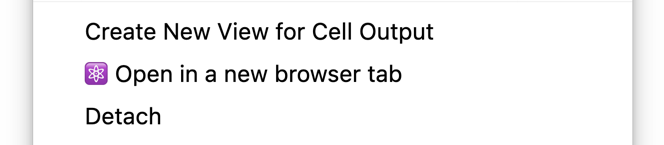

JupyterLab opens a `/doc/tree/...` page in Simple Interface mode and Pret mounts the widget to the full browser viewport for the selected cell.

!!! tip "Kernel"

    Keep the notebook kernel running: this page is backed by the live notebook session.